In [2]:
import os
from os.path import join as oj
import sys
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
plt.style.use('dark_background')

# load results from a directory

In [3]:
out_dir = '/scratch/users/vision/chandan/dl_theory/resweep_seed_and_hidden1' # differs for chandan/raaz

# pickle load example
fnames = os.listdir(out_dir)
results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in fnames]
results = pd.concat(results_list, axis=1).T.convert_objects(convert_numeric=True)
results.head()
# results.describe()

/accounts/projects/vision/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,N,accs,batch_size,d_in,d_out,gamma_optimizer,hidden1,labs,losses,lr,max_acc,means,min_loss,norms,num_iters,num_layers,sds,seed,step_size_optimizer,weights
0,2000,"[65.85, 65.85, 65.85, 65.85, 65.85, 65.85, 65....",2000,1,2,0.9,2,"[0, 1, 0]","[886.2813110351562, 886.2324829101562, 886.117...",0.000001,65.8500,"[0, 20, 40]",873.320923,"[[1.0829914473082596, 0.959597020135849], [1.0...",200,2,"[1, 1, 1]",97,1000,"{0: {'2.weight': [[-0.04046493 0.4900381 ], [..."
1,2000,"[44.753, 44.753, 44.753, 44.753, 44.753, 44.75...",2000,1,2,0.9,5,"[0, 1, 0]","[1446.0673828125, 1445.576171875, 1445.0560302...",0.000001,66.5000,"[0, 20, 40]",857.356934,"[[1.8523452861181262, 0.8343170151562305], [1....",200,2,"[1, 1, 1]",7,1000,{0: {'2.weight': [[ 0.3175066 0.04556719 -0....
2,2000,"[66.14999999999999, 66.14999999999999, 66.1499...",2000,1,2,0.9,4,"[0, 1, 0]","[1435.416259765625, 1435.373779296875, 1435.34...",0.000001,66.1500,"[0, 20, 40]",1429.190308,"[[3.1436096287673223, 1.152634286928233], [3.1...",200,2,"[1, 1, 1]",8,1000,"{0: {'0.weight': [[0.19585767], [0.69059235], ..."
3,2000,"[61.194, 61.194, 61.232600000000005, 61.232600...",2000,1,2,0.9,6,"[0, 1, 0]","[1536.8685302734375, 1536.5831298828125, 1536....",0.000001,69.3000,"[0, 20, 40]",1485.507202,"[[6.1413373172819234, 0.5930170336575351], [6....",200,2,"[1, 1, 1]",92,1000,{0: {'2.weight': [[-0.04043442 0.23349898 0....
4,2000,"[43.63, 43.63, 43.63, 43.63, 43.63, 43.63, 43....",2000,1,2,0.9,4,"[0, 1, 0]","[1626.667236328125, 1626.466796875, 1626.27514...",0.000001,44.1214,"[0, 20, 40]",1591.204590,"[[4.367652003267324, 0.5663884892937858], [4.3...",200,2,"[1, 1, 1]",35,1000,"{0: {'0.weight': [[-0.4758551], [-0.70488816],..."


# compare losses by hidden layer dim

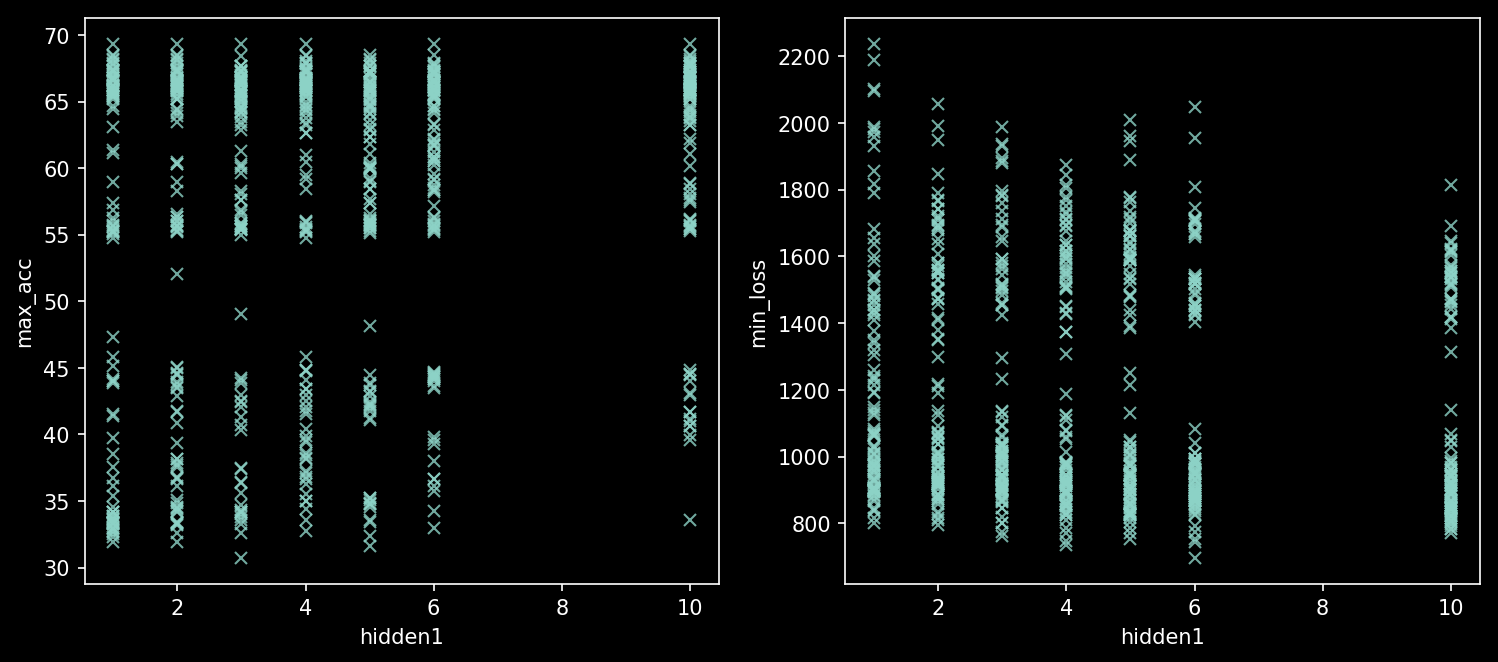

In [112]:
def lmplot(colx, coly, data=results):    
    plt.plot(data[colx], data[coly], 'x', alpha=0.8)
    plt.xlabel(colx)
    plt.ylabel(coly)

plt.figure(figsize=(12, 5), dpi=150)
plt.subplot(121)
lmplot('hidden1', 'max_acc')

plt.subplot(122)
lmplot('hidden1', 'min_loss')

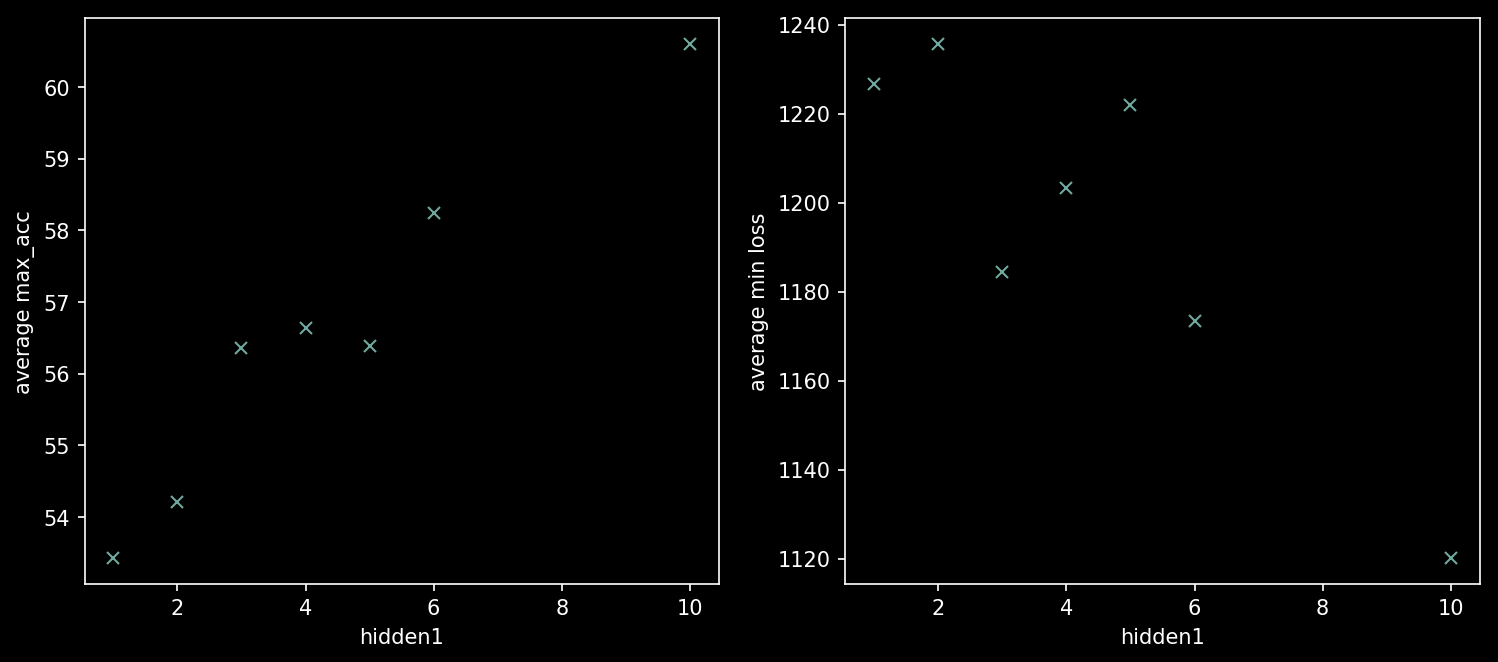

In [127]:
max_accs = results[['max_acc', 'min_loss', 'hidden1']].groupby(['hidden1']).mean().reset_index()
max_accs.head()
# lmplot('hidden1', 'max_acc', max_accs)
# plt.ylabel('average max acc')
# plt.show()

plt.figure(figsize=(12, 5), dpi=150)
plt.subplot(121)
lmplot('hidden1', 'max_acc', max_accs)
plt.ylabel('average max_acc')

plt.subplot(122)
lmplot('hidden1', 'min_loss', max_accs)
plt.ylabel('average min loss')
plt.show()

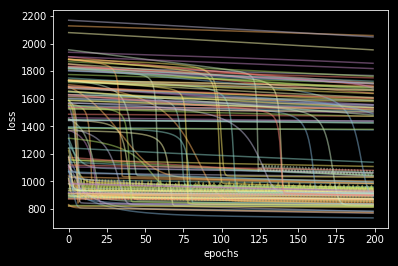

In [120]:
hiddens = results['hidden1'].values
loss_curves = np.array([np.array(x) for x in results['losses'].values if np.random.rand() < 0.2]) # filter by some amount
loss_curves = loss_curves.reshape(loss_curves.shape[0], -1)
plt.plot(loss_curves.T, alpha=0.5)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# plot preds

In [ ]:
model = results.loc[0]['model']
X, y, y_plot = data.generate_gaussian_data(results['N'], means=results['means'], sds=results['sds'], labs=results['labs'])

# plot predictions
plt.figure(figsize=(5, 5), dpi=150)

preds = model(Variable(torch.from_numpy(X), requires_grad=True)).data.numpy() # predict
# plt.scatter(X, np.argmax(preds, axis=1), label='pred top class')
plt.scatter(X, np.argmax(y, axis=-1), label='data labels', alpha=0.5, marker='x')
plt.scatter(X_grid, preds_grid[:, 1], label='pred probability of class 1', color='orange') # note other class is 1 - this
# plt.scatter(X_grid, preds_grid[:, 0], label='pred probability of class 0', color='green') # note other class is 1 - this
plt.plot([-1000, 1000], [0.5, 0.5], '--')
plt.xlim([np.min(X), np.max(X)])
plt.legend()
plt.show()